# TP 1 DA SILVA PEREIRA Théo

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 3.1 : Importation et affichage des images

En haut à gauche : [162 114  94]
En haut à droite : [59 32 23]
En bas à gauche : [163 109  97]
En bas à droite : [227 217 215]


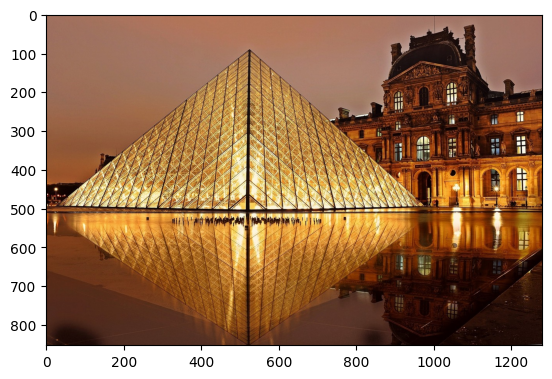

In [28]:
# Importation de l'image
louvre=plt.imread('Louvre.jpg')

# Affichage de l'image
plt.imshow(louvre)

# Affichage des couleurs des coins de l'image
print("En haut à gauche :", louvre[0,0])
print("En haut à droite :", louvre[-1, 0])
print("En bas à gauche :", louvre[0, -1])
print("En bas à droite :", louvre[-1, -1])

## Exercice 3.2 
La méthode .shape() retourne les dimensions d’un ndarray. Pour récupérer les dimensions d’une image appelée image , on pourra utiliser la commande image.shape([0 :2]). La fonction int() retourne la partie entière d’un nombre à virgule flottante (ce qui sera utile pour bien avoir des coordonnées entières).
1. Créer une fonction qui prend en entrée une image et retourne les coordonnées du centre de
cette image.
2. Retourner les niveaux de couleurs au centre de l’image précédemment choisie.

In [10]:
def centre(image):
    return (len(image)//2,len(image[0])//2)

print("Coordonnées du centre :",centre(louvre))
print("Couleur du centre :", louvre[centre(louvre)])

Coordonnées du centre : (426, 640)
Couleur du centre : [120  65  26]


# 3.2 : Création des matrices et transformations mathématiques

## <u>Exercice 3.3</u> : Translation
Créer une fonction translation(vecteur, point) qui prend en entrée un vecteur et un point et retourne l’image du point par la translation de vecteur donné.
Les vecteur et point seront des couples de coordonnées. Vous pouvez les transformer en classe
array de numpy, utiliser l’addition de numpy et retourner un couple avec la fonction tuple() qui
transforme un objet de type array et le transforme en un uplet (tuple en anglais)

In [20]:
def translation(vecteur,point):
    return np.array(vecteur)+np.array(point)

print(translation((3,2),(40,20)))

[43 22]


## <u>Exercice 3.4</u> : Homothétie
Créer une fonction homothetie(centre, rapport, point) qui prend en entrée le centre, le rapport d’une homothétie, un point et retourne l’image du point par l’homothétie de centre et de rapport donnés.

In [ ]:
def homothetie(centre, rapport, point):
    return translation(translation(np.array(centre)*-1,point)*rapport,centre)

print(homothetie((1,1),2,(3,3)))

[5 5]


## <u>Exercice 3.5</u> : Matrice de rotation
Créer une fonction matrice_rotation(angle) qui prend en entrée un angle en degrés et retourne la matrice de la rotation pour cet angle. On utilisera la bibliothèque math avec les fonctions cos, sin et radians. Les fonctions sinus et cosinus prennent en argument des radians. Il faudra donc convertir les degrés en radians.

In [17]:
def matrice_rotation(angle):
    angle=math.radians(angle)
    return [[math.cos(angle),math.sin(angle)*-1],[math.sin(angle),math.cos(angle)]]

print(np.array(matrice_rotation(90)))

[[ 6.123234e-17 -1.000000e+00]
 [ 1.000000e+00  6.123234e-17]]


## <u>Exercice 3.6</u> : Rotation
Créer une fonction rotation(centre, angle, point) qui prend en entrée le centre de la rotation, son angle, un point et retourne l’image du point par la rotation de centre et d’angle donnés. On pourra faire appel à la fonction créée à l’Exercice 3.5.

In [18]:
def rotation(centre, angle, point):
    matrice=matrice_rotation(angle)
    rotationPointInit=matrice*translation(np.array(centre)*-1,point)
    return translation(rotationPointInit,centre)

print(rotation((10,10),45,(1,1)))

[[ 3.63603897 16.36396103]
 [ 3.63603897  3.63603897]]


## <u>Exercice 3.7</u> : Symétrie (facultatif)
Créer une fonction symetrie(point,coecients_droite) qui prend en entrées un point et les coecients (a, b, c ) de la droite D d’équation ax + by + c = 0 et retourne l’image du point par la symétrie d’axe D.

In [19]:
def symetrie(point,coefficients_droite):
    a=coefficients_droite[0]
    b=coefficients_droite[1]
    c=coefficients_droite[2]
    x=point[0]
    y=point[1]
    return translation(point,(-2*(a*x+b*y-c)/(a*a+b*b))*point)

# 3.3 Transformations géométriques sur les images

## <u> Exercice 3.3.1</u> : Principe

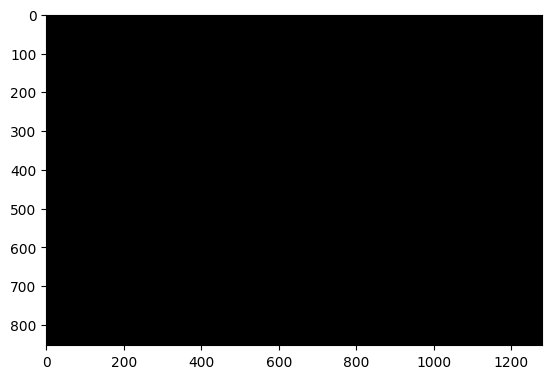

In [26]:
ancienne_image = louvre

# Récuếration des dimensions de l'image
(m,n) = ancienne_image.shape[0:2]

# Création d'une nouvelle image noire
nouvelle_image = np.zeros((m,n,3),dtype=np.uint8)

# Affichage de la nouvelle image
plt.imshow(nouvelle_image)